In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

pd.set_option('display.max_rows', 100)

In [106]:
# 1. read the csv data into a Pandas DataFrame
df_audio_features = pd.read_csv("../data/spotify/audio_features_1000.csv",
                                index_col=["artist", "name"])
df_audio_features.drop('duration_ms', inplace=True, axis=1)
df_audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,0.539453,0.505664,5.162942,-10.905531,0.668349,0.087162,0.457546,0.183011,0.174769,0.479320,115.708104,3.892574
std,0.221713,0.281347,3.553668,7.022320,0.470976,0.086485,0.373329,0.333862,0.144451,0.290341,32.012234,0.445430
min,0.059600,0.000020,0.000000,-44.406000,0.000000,0.023200,0.000002,0.000000,0.020700,0.019600,49.689000,1.000000
25%,0.376000,0.256500,2.000000,-14.521000,0.000000,0.038400,0.079550,0.000000,0.090300,0.225000,90.953500,4.000000
50%,0.567000,0.544000,5.000000,-8.629000,1.000000,0.048700,0.400000,0.000107,0.119000,0.483000,110.015000,4.000000
75%,0.716500,0.746500,8.000000,-5.552000,1.000000,0.090550,0.864000,0.135500,0.204000,0.733500,136.039000,4.000000
max,0.964000,0.996000,11.000000,1.085000,1.000000,0.576000,0.996000,0.985000,0.985000,0.985000,206.313000,5.000000


In [107]:
audio_features = df_audio_features.copy()

quant_transform = QuantileTransformer()
scaled_audio_features = quant_transform.fit_transform(audio_features)

scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

scaled_audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,0.499991,0.499991,0.495159,0.500001,0.668349,0.500010,0.500003,0.445550,0.499998,0.500009,0.500006,0.499966
std,0.288983,0.288985,0.302193,0.288985,0.470976,0.288992,0.288990,0.350760,0.289006,0.288995,0.288990,0.171991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250371,0.250097,0.272773,0.249908,0.000000,0.248749,0.250119,0.000000,0.249750,0.250228,0.250225,0.544044
50%,0.499499,0.500000,0.487487,0.499785,1.000000,0.500000,0.499499,0.499499,0.503003,0.500501,0.499499,0.544044
75%,0.750052,0.750434,0.728228,0.749817,1.000000,0.749993,0.749888,0.750015,0.749750,0.750052,0.750127,0.544044
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Use inertia to estimate the correct number of clusters

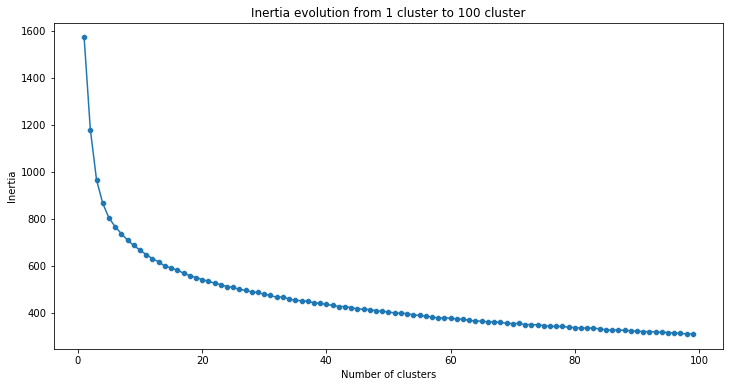

In [87]:
inertia = []
max_k = 100

for k in range(1, max_k):
    k_means = KMeans(n_clusters=k)
    k_means.fit(scaled_audio_features)
    
    inertia.append(round(k_means.inertia_))

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} clusters')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Try different values of n_init to see if the results improve

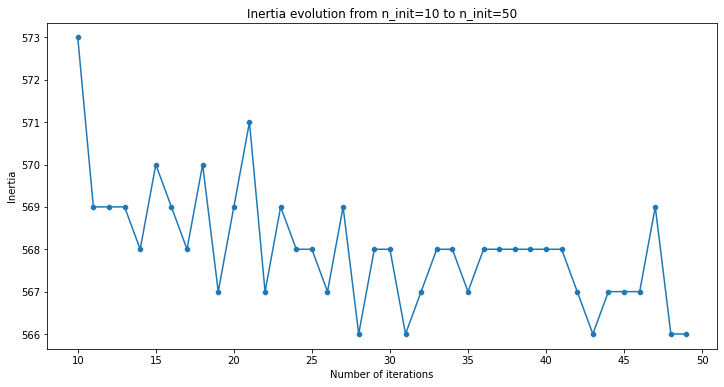

In [92]:
inertia = []
max_n = 50

for n in range(10, max_n):
    k_means = KMeans(n_clusters=17, n_init=n)
    k_means.fit(scaled_audio_features)
    
    inertia.append(round(k_means.inertia_))
    
fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from n_init=10 to n_init={max_n}')
sns.lineplot(x=range(10, max_n), y=inertia)
sns.scatterplot(x=range(10, max_n), y=inertia)
plt.xlabel('Number of iterations')
plt.ylabel('Inertia')
plt.show()

#### k=17, n_init=27 seem to give the best results

In [94]:
k_means = KMeans(n_clusters=17, n_init=27)
k_means.fit(scaled_audio_features)
scaled_audio_features['cluster'] = k_means.labels_

In [98]:
scaled_audio_features.groupby(by="cluster").mean() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,
0,0.235204,0.188927,0.421475,0.175195,1.0,0.321877,0.819963,0.804182,0.493413,0.247065,0.722217,0.411222
1,0.680148,0.737914,0.751889,0.778562,1.0,0.720873,0.316209,0.046035,0.751179,0.579266,0.523922,0.537656
2,0.172162,0.150004,0.510940,0.151231,0.0,0.311139,0.828089,0.844797,0.495834,0.159006,0.362224,0.462985
3,0.625393,0.606150,0.371972,0.525777,1.0,0.164833,0.389806,0.504254,0.334681,0.777597,0.610884,0.533300
4,0.765820,0.686231,0.840932,0.728249,0.0,0.745083,0.299432,0.173064,0.686248,0.647683,0.537510,0.536301
5,0.129634,0.136017,0.492922,0.131628,1.0,0.361932,0.861044,0.794111,0.466089,0.148164,0.154481,0.393682
6,0.790167,0.494486,0.622054,0.478559,1.0,0.709515,0.474339,0.609386,0.504613,0.746152,0.412432,0.549834
7,0.370916,0.899541,0.567397,0.793604,0.0,0.591249,0.083608,0.657356,0.652207,0.374255,0.719043,0.515035
8,0.751858,0.697745,0.469283,0.746875,1.0,0.767077,0.336944,0.151549,0.181623,0.730360,0.566660,0.552984


In [97]:
# The cluster centers are the mean of the values in each cluster
centroids = k_means.cluster_centers_
pd.DataFrame(centroids)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.235204,0.188927,0.421475,0.175195,1.000000e+00,0.321877,0.819963,0.804182,0.493413,0.247065,0.722217,0.411222
1,0.680148,0.737914,0.751889,0.778562,1.000000e+00,0.720873,0.316209,0.046035,0.751179,0.579266,0.523922,0.537656
2,0.172162,0.150004,0.510940,0.151231,-4.440892e-16,0.311139,0.828089,0.844797,0.495834,0.159006,0.362224,0.462985
3,0.625393,0.606150,0.371972,0.525777,1.000000e+00,0.164833,0.389806,0.504254,0.334681,0.777597,0.610884,0.533300
4,0.765820,0.686231,0.840932,0.728249,-1.110223e-16,0.745083,0.299432,0.173064,0.686248,0.647683,0.537510,0.536301
5,0.129634,0.136017,0.492922,0.131628,1.000000e+00,0.361932,0.861044,0.794111,0.466089,0.148164,0.154481,0.393682
6,0.790167,0.494486,0.622054,0.478559,1.000000e+00,0.709515,0.474339,0.609386,0.504613,0.746152,0.412432,0.549834
7,0.370916,0.899541,0.567397,0.793604,-4.440892e-16,0.591249,0.083608,0.657356,0.652207,0.374255,0.719043,0.515035
8,0.751858,0.697745,0.469283,0.746875,1.000000e+00,0.767077,0.336944,0.151549,0.181623,0.730360,0.566660,0.552984
9,0.475909,0.839095,0.421752,0.722348,1.000000e+00,0.688729,0.166410,0.629388,0.672243,0.491554,0.739224,0.513854


### Silhouette score

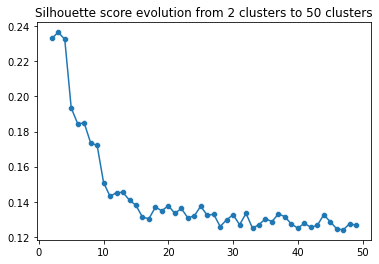

In [128]:
from sklearn.metrics import silhouette_score

silhouette_score_list = []
max_k = 50

for k in range(2, max_k):
    k_means = KMeans(n_clusters=k)
    k_means.fit(scaled_audio_features)
        
    silhouette_score_list.append(silhouette_score(scaled_audio_features, k_means.labels_))

plt.title(f'Silhouette score evolution from 2 clusters to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=silhouette_score_list)
sns.scatterplot(x=range(2, max_k), y=silhouette_score_list)
plt.show()

### Now we will try out different transformers and also removing some columns which may be inaccurate to see if our results improve

When all columns are included, k=6,12/13 show peaks in silhouette score

In [183]:
def look_for_number_of_clusters(scaled_audio_features):
    inertia = []
    silhouette_score_list = []
    max_k = 40

    for k in range(2, max_k):
        k_means = KMeans(n_clusters=k, n_init=27, random_state=123)
        k_means.fit(scaled_audio_features)

        inertia.append(k_means.inertia_)
        silhouette_score_list.append(silhouette_score(scaled_audio_features, k_means.labels_))

    # Plot inertia
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Inertia evolution from 1 cluster to {max_k} clusters')
    sns.lineplot(x=range(2, max_k), y=inertia)
    sns.scatterplot(x=range(2, max_k), y=inertia)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Plot silhouette score
    plt.title(f'Silhouette score evolution from 2 clusters to {max_k} clusters')
    sns.lineplot(x=range(2, max_k), y=silhouette_score_list)
    sns.scatterplot(x=range(2, max_k), y=silhouette_score_list)
    plt.show()


#### MinMaxScaler

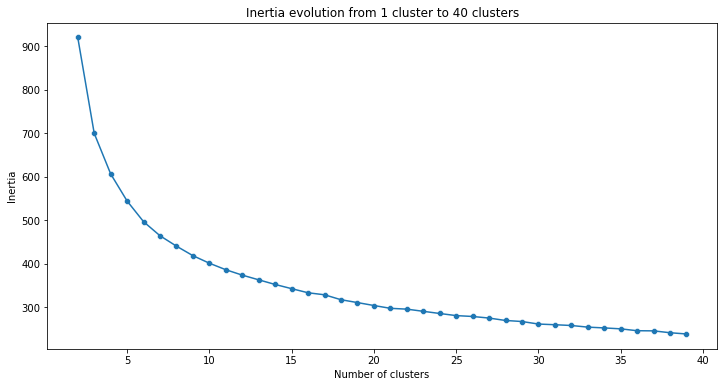

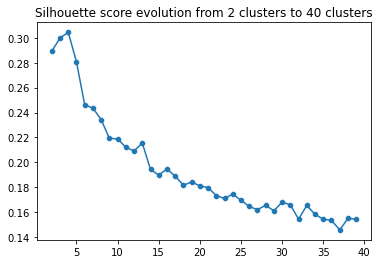

In [184]:
'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
audio_features = df_audio_features.copy()
#scaled_audio_features.drop(['speechiness', 'key', 'mode', 'time_signature'], inplace=True, axis=1)

transformer = MinMaxScaler(feature_range=(0,1))
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features)


In [208]:
# Check the best values

k_means = KMeans(n_clusters=13, n_init=27, random_state=123)
k_means.fit(scaled_audio_features)

print('inertia: ', k_means.inertia_)
print('silhouette_score: ', silhouette_score(scaled_audio_features, k_means.labels_))

scaled_audio_features['cluster'] = k_means.labels_
scaled_audio_features.head()

inertia:  6777.1475949658825
silhouette_score:  0.13222783913312441


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
artist,name,,,,,,,,,,,,,
Elvis Presley,Don't Be Cruel,0.710845,0.157640,-0.890371,-0.084115,0.704432,1.062270,1.067684,-0.548259,-0.582199,1.256492,-0.965795,0.241261,12
Frank Sinatra,I've Got You Under My Skin - Remastered 1998,0.205506,-0.919712,-1.171872,-0.243094,0.704432,-0.545515,-0.014861,-0.548335,-0.469317,0.384789,0.357552,0.241261,4
The Platters,Smoke Gets In Your Eyes,-1.125522,-0.990824,-0.608870,-0.306914,0.704432,-0.648460,1.303486,-0.548124,3.062570,-0.879697,-0.044690,0.241261,0
Ray Charles,"What'd I Say, Pt. 1 & 2",0.002467,0.623426,-0.327369,0.778589,0.704432,-0.420594,0.939065,-0.548362,-0.088427,1.084219,-0.853829,0.241261,12
Ella Fitzgerald,Dream A Little Dream Of Me,-0.381049,-1.204161,-1.453373,-0.385691,0.704432,-0.153401,1.233817,-0.548362,-0.012249,-0.259513,-1.237164,0.241261,4


In [209]:
scaled_audio_features[scaled_audio_features.cluster==0].head(100)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
artist,name,,,,,,,,,,,,,
The Platters,Smoke Gets In Your Eyes,-1.125522,-0.990824,-0.608870,-0.306914,0.704432,-0.648460,1.303486,-0.548124,3.062570,-0.879697,-0.044690,0.241261,0
Bobby Darin,Dream Lover,-0.060700,0.954098,-0.045868,1.312508,0.704432,-0.477271,0.689865,-0.548362,1.816021,0.812027,0.500205,0.241261,0
Frank Sinatra,I Get A Kick Out Of You,-0.651766,-0.464593,-0.045868,-0.008614,-1.419584,-0.567492,0.261135,-0.548362,2.778634,1.018755,1.949861,0.241261,0
Dinah Washington,Baby (You've Got What It Takes),0.679261,0.008304,0.798635,0.140393,0.704432,-0.465704,1.054286,-0.547807,2.224612,1.166910,0.536985,0.241261,0
Paul Anka,Diana,0.052099,0.250086,0.517134,0.344103,0.704432,-0.632266,0.815805,-0.548362,4.350670,1.514902,0.847041,0.241261,0
Elvis Presley,Hound Dog,-0.205083,0.890097,-1.453373,0.343818,0.704432,-0.431004,0.738097,-0.533230,4.052883,1.618266,-0.900390,0.241261,0
Duane Eddy,Rebel Rouser,-0.683350,-0.254811,0.517134,-0.155485,0.704432,-0.598723,0.888153,2.310139,3.831274,1.356410,2.831342,0.241261,0
Muddy Waters,Mannish Boy,0.264161,0.815429,-0.890371,0.003352,0.704432,0.117263,-0.047016,-0.547718,3.505787,0.467480,-0.143094,-2.004570,0
The Isley Brothers,"Shout, Pts. 1 & 2",-0.227642,1.281215,1.361636,0.494677,0.704432,0.070995,0.791689,-0.548362,4.856214,-0.218168,0.716294,0.241261,0


#### QuantileTransformer

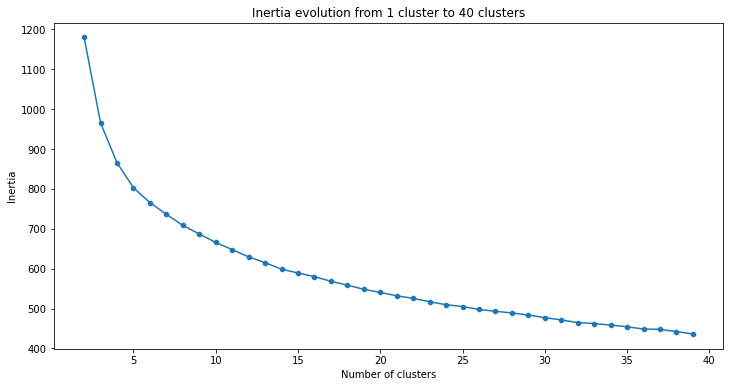

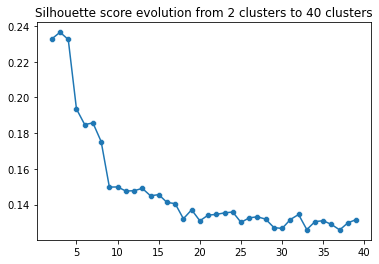

In [201]:
'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
audio_features = df_audio_features.copy()
#scaled_audio_features.drop(['speechiness', 'key', 'mode', 'time_signature'], inplace=True, axis=1)

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features)

In [204]:
# Check the best values

k_means = KMeans(n_clusters=13, n_init=27, random_state=123)
k_means.fit(scaled_audio_features)

print('inertia: ', k_means.inertia_)
print('silhouette_score: ', silhouette_score(scaled_audio_features, k_means.labels_))

scaled_audio_features['cluster'] = k_means.labels_
scaled_audio_features.head()

inertia:  615.0116027610527
silhouette_score:  0.4561367856020966


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
artist,name,,,,,,,,,,,,,
Elvis Presley,Don't Be Cruel,0.724387,0.508509,0.272773,0.367761,1.0,0.864865,0.742743,0.462492,0.255394,0.877377,0.182312,0.544044,5
Frank Sinatra,I've Got You Under My Skin - Remastered 1998,0.531031,0.241742,0.173674,0.325352,1.0,0.296296,0.531930,0.413417,0.399900,0.605105,0.670612,0.544044,4
The Platters,Smoke Gets In Your Eyes,0.176176,0.224224,0.337838,0.304625,1.0,0.075075,0.860861,0.490929,0.972889,0.249639,0.534636,0.544044,11
Ray Charles,"What'd I Say, Pt. 1 & 2",0.450938,0.665165,0.397898,0.762763,1.0,0.529530,0.705426,0.000000,0.669670,0.818868,0.220450,0.544044,9
Ella Fitzgerald,Dream A Little Dream Of Me,0.328282,0.176176,0.000000,0.282249,1.0,0.694766,0.811812,0.000000,0.694695,0.418418,0.083071,0.544044,4


In [ ]:
#scaled_audio_features[scaled_audio_features.cluster==1].head(100)

#### StandardScaler

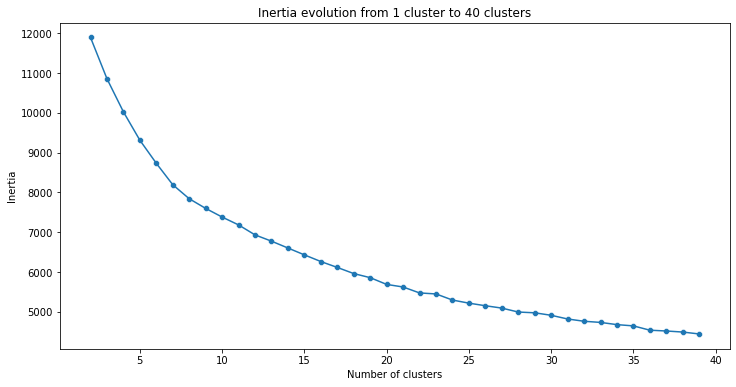

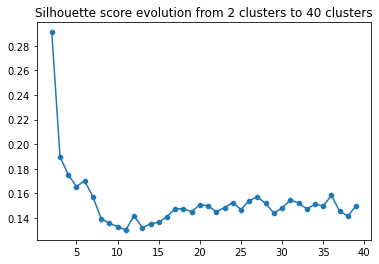

In [205]:
'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
audio_features = df_audio_features.copy()
#scaled_audio_features.drop(['speechiness', 'key', 'mode', 'time_signature'], inplace=True, axis=1)

transformer = StandardScaler()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features)

In [220]:
# Check the best values

k_means = KMeans(n_clusters=36, n_init=27, random_state=123)
k_means.fit(scaled_audio_features)

print('inertia: ', k_means.inertia_)
print('silhouette_score: ', silhouette_score(scaled_audio_features, k_means.labels_))

scaled_audio_features['cluster'] = k_means.labels_
scaled_audio_features.head()

inertia:  4838.011690889165
silhouette_score:  0.17569761039320358


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
artist,name,,,,,,,,,,,,,
Elvis Presley,Don't Be Cruel,0.710845,0.157640,-0.890371,-0.084115,0.704432,1.062270,1.067684,-0.548259,-0.582199,1.256492,-0.965795,0.241261,18
Frank Sinatra,I've Got You Under My Skin - Remastered 1998,0.205506,-0.919712,-1.171872,-0.243094,0.704432,-0.545515,-0.014861,-0.548335,-0.469317,0.384789,0.357552,0.241261,2
The Platters,Smoke Gets In Your Eyes,-1.125522,-0.990824,-0.608870,-0.306914,0.704432,-0.648460,1.303486,-0.548124,3.062570,-0.879697,-0.044690,0.241261,6
Ray Charles,"What'd I Say, Pt. 1 & 2",0.002467,0.623426,-0.327369,0.778589,0.704432,-0.420594,0.939065,-0.548362,-0.088427,1.084219,-0.853829,0.241261,18
Ella Fitzgerald,Dream A Little Dream Of Me,-0.381049,-1.204161,-1.453373,-0.385691,0.704432,-0.153401,1.233817,-0.548362,-0.012249,-0.259513,-1.237164,0.241261,21


In [ ]:
#scaled_audio_features[scaled_audio_features.cluster==1].head(100)

#### RobustScaler

In [211]:
'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
audio_features = df_audio_features.copy()
#scaled_audio_features.drop(['speechiness', 'key', 'mode', 'time_signature'], inplace=True, axis=1)

transformer = StandardScaler()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

In [ ]:
look_for_number_of_clusters(scaled_audio_features)

In [212]:
# Check the best values

k_means = KMeans(n_clusters=13, n_init=27, random_state=123)
k_means.fit(scaled_audio_features)

print('inertia: ', k_means.inertia_)
print('silhouette_score: ', silhouette_score(scaled_audio_features, k_means.labels_))

scaled_audio_features['cluster'] = k_means.labels_
scaled_audio_features.head()

inertia:  6777.1475949658825
silhouette_score:  0.13222783913312441


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
artist,name,,,,,,,,,,,,,
Elvis Presley,Don't Be Cruel,0.710845,0.157640,-0.890371,-0.084115,0.704432,1.062270,1.067684,-0.548259,-0.582199,1.256492,-0.965795,0.241261,12
Frank Sinatra,I've Got You Under My Skin - Remastered 1998,0.205506,-0.919712,-1.171872,-0.243094,0.704432,-0.545515,-0.014861,-0.548335,-0.469317,0.384789,0.357552,0.241261,4
The Platters,Smoke Gets In Your Eyes,-1.125522,-0.990824,-0.608870,-0.306914,0.704432,-0.648460,1.303486,-0.548124,3.062570,-0.879697,-0.044690,0.241261,0
Ray Charles,"What'd I Say, Pt. 1 & 2",0.002467,0.623426,-0.327369,0.778589,0.704432,-0.420594,0.939065,-0.548362,-0.088427,1.084219,-0.853829,0.241261,12
Ella Fitzgerald,Dream A Little Dream Of Me,-0.381049,-1.204161,-1.453373,-0.385691,0.704432,-0.153401,1.233817,-0.548362,-0.012249,-0.259513,-1.237164,0.241261,4


In [219]:
test_cluster = 4
test_cluster_df = scaled_audio_features[scaled_audio_features.cluster==test_cluster]
print(test_cluster_df.shape)
test_cluster_df.head(100)

(120, 13)


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
artist,name,,,,,,,,,,,,,
Frank Sinatra,I've Got You Under My Skin - Remastered 1998,0.205506,-0.919712,-1.171872,-0.243094,0.704432,-0.545515,-0.014861,-0.548335,-0.469317,0.384789,0.357552,0.241261,4
Ella Fitzgerald,Dream A Little Dream Of Me,-0.381049,-1.204161,-1.453373,-0.385691,0.704432,-0.153401,1.233817,-0.548362,-0.012249,-0.259513,-1.237164,0.241261,4
The Everly Brothers,All I Have to Do Is Dream,0.011491,-0.564150,-0.327369,-0.442388,0.704432,-0.698197,0.872076,-0.548362,-0.213082,0.402016,-0.374964,0.241261,4
Bobby Darin,Mack the Knife,0.043075,0.082972,-0.608870,-0.197366,-1.419584,0.241027,0.810446,-0.548362,0.216285,-0.052785,-1.029762,0.241261,4
Buddy Holly,Everyday,0.936443,-1.019269,-0.608870,-0.235971,0.704432,-0.579059,0.338842,-0.548285,-0.469317,0.064360,0.620421,0.241261,4
Sam Cooke,You Send Me,-0.006556,-0.994380,-0.327369,-0.414752,-1.419584,-0.675064,1.306165,-0.548362,-0.344662,0.253861,-0.586147,0.241261,4
Ella Fitzgerald,Cheek To Cheek,0.489759,-0.709930,-1.453373,-0.354636,0.704432,0.013161,0.349560,-0.548362,0.534847,0.625971,0.197461,0.241261,4
Jim Reeves,He'll Have to Go,0.065635,-1.136604,-1.171872,-0.703792,0.704432,-0.569806,1.209701,-0.544047,-0.448541,-0.962389,-1.078949,-2.004570,4
Elvis Presley,Heartbreak Hotel,0.706333,-1.051270,-0.327369,-0.144801,0.704432,-0.233212,1.024811,-0.548357,-0.469317,0.818918,-0.692645,0.241261,4
